In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
diabetes_df_original = pd.read_csv('diabetes.csv')
# to view the first 5 rows of a table 
diabetes_df_original.head()
# for viewing all the column names 
diabetes_df_original.columns
# shows info  
diabetes_df_original.info()
# to analyse the stastics of the table
diabetes_df_original.describe()
# fill all the zeros (0) with NaN to track the null values 
# because in medical 0 represents the no data
# make copy of dataset . this helps us not to loose the original data
diabetes_df_dummie = diabetes_df_original.copy(deep = True)
diabetes_df_dummie[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_dummie[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# calulating the null values 
diabetes_df_dummie.isnull().sum()
#'Glucose','BloodPressure','SkinThickness','Insulin','BMI' consists of null values 
# handle the missing values through folling mean and median methods
# handle the mean values through mean and median 
diabetes_df_dummie['Glucose'].fillna(diabetes_df_dummie['Glucose'].mean(), inplace = True)
diabetes_df_dummie['BloodPressure'].fillna(diabetes_df_dummie['BloodPressure'].mean(), inplace = True)
diabetes_df_dummie['SkinThickness'].fillna(diabetes_df_dummie['SkinThickness'].median(), inplace = True)
diabetes_df_dummie['Insulin'].fillna(diabetes_df_dummie['Insulin'].median(), inplace = True)
diabetes_df_dummie['BMI'].fillna(diabetes_df_dummie['BMI'].median(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


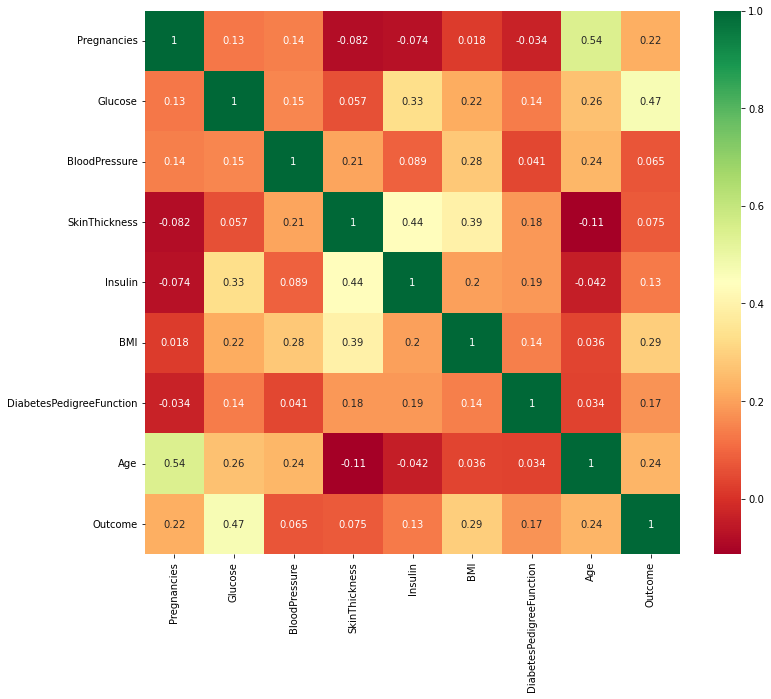

In [5]:
# visualize the correlation  heat map
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df_original.corr(), annot=True,cmap ='RdYlGn')
# use preprocessing techinique 
# scalar preprocessing the data helps to get better acurrecy
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_df_dummie.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = diabetes_df_dummie.Outcome
X.head()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=20)

In [7]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)


from sklearn import metrics
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))

Accuracy_Score = 0.7755905511811023
[[150  21]
 [ 36  47]]


In [8]:
# support vector mechine classifier 
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)


from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))
print(confusion_matrix(y_test, predictions))

Accuracy Score = 0.7755905511811023
[[150  21]
 [ 36  47]]


In [9]:
import pickle as pk
#dump the svm model 
pk.dump(svc_model,open('svc_model.sav','wb'))
#for random forest dumping
pk.dump(rfc,open('rfc.sav','wb'))

# load the models for prediction
SVC=pk.load(open('svc_model.sav','rb'))
RFC=pk.load(open('rfc.sav','rb'))
#results=[ac1,ac2]
names=["svc_model","rfc"]

In [22]:
from tkinter import *
import tkinter.messagebox
import customtkinter
import sys
from PIL import Image, ImageTk# <- import PIL for the images
from tkinter.ttk import *
import matplotlib as plt
import urllib.request
from PIL import Image
customtkinter.set_appearance_mode("light")

customtkinter.set_default_color_theme("blue")

top=customtkinter.CTk()


top.geometry("1920x1080")
top.title("heart stroke prediction")  


def do_something():
    tkinter.messagebox.showinfo("ERROR"," Please enter the full data .....")
    
    
def button():
    if (len(entry.get())==0 or len(entry1.get())==0 or len(entry2.get())==0 or len(entry3.get())==0 or len(entry4.get())==0 or len(entry5.get())==0 or len(entry6.get())==0 or len(entry7.get())==0):
        tkinter.messagebox.showinfo("ERROR","PLEASE ENTER ALL THE VALUES "u"\U0001F643 "u"\U0001F643")
    else:
        X1=float(entry.get())
        X2=float(entry1.get())
        X3=float(entry2.get())
        X4=float(entry3.get())
        X5=float(entry4.get())
        X6=float(entry5.get())
        X7=float(entry6.get())
        X8=float(entry7.get())
    
    
        entered_data = np.array([[X1,X2,X3,X4,X5,X6,X7,X8]])
    
        SVC_prediction=SVC.predict(entered_data)
        RFC_prediction=RFC.predict(entered_data)
        print(SVC_prediction)
        print(RFC_prediction)
        k1="👉According to the rfc algorithm ,you have a chance of being {pro} ".format( pro="LOW RISK" if int(SVC_prediction)==0 else "HIGH RISK" )
        k2="👉According to the svc algorithm ,you have a chance of being {pro} ".format( pro="LOW RISK" if int(RFC_prediction)==0 else "HIGH RISK")
    
    
        if SVC_prediction==1:
            color="#EE55A7"
            outputLabel=customtkinter.CTkLabel(master=top,text="ACC to SVC you dont have RISK At All",width=350,height=30,corner_radius=10,fg_color=("white", "gray20"),text_color=color)
            outputLabel.place(relx=0.3, rely=0.75,anchor=tkinter.CENTER)
        else:
            color="#5EA880"
            outputLabel=customtkinter.CTkLabel(master=top,text="ACC to SVC you have chances Diabates ",width=350,height=30,corner_radius=10,fg_color=("white", "gray20"),text_color=color)
            outputLabel.place(relx=0.3, rely=0.75,anchor=tkinter.CENTER)
            
        if RFC_prediction==1:
            color="#EE55A7"
            outputLabel=customtkinter.CTkLabel(master=top,text="Acc to RFC you dont have RISK At All",width=450,height=50,corner_radius=10,fg_color=("white", "gray20"),text_color=color)
            outputLabel.place(relx=0.8, rely=0.75,anchor=tkinter.CENTER)
        else:
            color="#5EA880"
            outputLabel=customtkinter.CTkLabel(master=top,text="Acc to RFC you have chances Diabates ",width=450,height=50,corner_radius=10,fg_color=("white", "gray20"),text_color=color)
            outputLabel.place(relx=0.8, rely=0.75,anchor=tkinter.CENTER)
        
        
        
            
            
frame = customtkinter.CTkFrame(master=top,width=320,height=720,corner_radius=10)
frame.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)

frame1 = customtkinter.CTkFrame(master=top,width=1080,height=300,corner_radius=10)
frame1.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)

label = customtkinter.CTkLabel(master=top,text="Pregnancies",width=150,height=25,corner_radius=5)

label.place(relx=0.25, rely=0.14, anchor=tkinter.CENTER)
entry = customtkinter.CTkEntry(master=top,placeholder_text="enter Pregnancies",width=250,height=35,corner_radius=10)
entry.place(relx=0.25, rely=0.19, anchor=tkinter.CENTER)
text1 = entry.get()


label1 = customtkinter.CTkLabel(master=top,text="Glucose",width=150,height=25,corner_radius=5)
label1.place(relx=0.25, rely=0.23, anchor=tkinter.CENTER)
entry1 = customtkinter.CTkEntry(master=top,placeholder_text="enter Glucose",width=250,height=35,corner_radius=10)
entry1.place(relx=0.25, rely=0.28, anchor=tkinter.CENTER)
text2 = entry1.get()

label2 = customtkinter.CTkLabel(master=top,text="BloodPressure",width=150,height=25,corner_radius=5)
label2.place(relx=0.25, rely=0.33, anchor=tkinter.CENTER)
entry2 = customtkinter.CTkEntry(master=top,placeholder_text="enter BloodPressure",width=250,height=35,corner_radius=10)
entry2.place(relx=0.25, rely=0.38, anchor=tkinter.CENTER)
text3 = entry2.get()

label3 = customtkinter.CTkLabel(master=top,text="SkinThickness",width=150,height=25,corner_radius=5)
label3.place(relx=0.49, rely=0.14, anchor=tkinter.CENTER)
entry3 = customtkinter.CTkEntry(master=top,placeholder_text="enter SkinThickness",width=250,height=35,corner_radius=10)
entry3.place(relx=0.49, rely=0.19, anchor=tkinter.CENTER)
text4 = entry3.get()

label4 = customtkinter.CTkLabel(master=top,text="Insulin",width=150,height=25,corner_radius=5)
label4.place(relx=0.49, rely=0.23, anchor=tkinter.CENTER)
entry4 = customtkinter.CTkEntry(master=top,placeholder_text="enter Insulin",width=250,height=35,corner_radius=10)
entry4.place(relx=0.49, rely=0.28, anchor=tkinter.CENTER)
text5 = entry4.get()

label5 = customtkinter.CTkLabel(master=top,text="BMI",width=150,height=35,corner_radius=5)
label5.place(relx=0.49, rely=0.33, anchor=tkinter.CENTER)
entry5 = customtkinter.CTkEntry(master=top,placeholder_text="enter BMI",width=250,height=35,corner_radius=10)
entry5.place(relx=0.49, rely=0.38, anchor=tkinter.CENTER)
text6 = entry5.get()

label6 = customtkinter.CTkLabel(master=top,text="DiabetesPedigreeFunction",width=150,height=25,corner_radius=5)
label6.place(relx=0.25, rely=0.43, anchor=tkinter.CENTER)
entry6 = customtkinter.CTkEntry(master=top,placeholder_text="enter DiabetesPedigreeFunction",width=250,height=35,corner_radius=10)
entry6.place(relx=0.25, rely=0.48, anchor=tkinter.CENTER)
text7= entry6.get()

label7 = customtkinter.CTkLabel(master=top,text="Age",width=150,height=25,corner_radius=5)
label7.place(relx=0.49, rely=0.43, anchor=tkinter.CENTER)
entry7 = customtkinter.CTkEntry(master=top,placeholder_text="enter Age",width=250,height=35,corner_radius=10)
entry7.place(relx=0.49, rely=0.48, anchor=tkinter.CENTER)


button=customtkinter.CTkButton(top,text="CHECK",compound=("right"),command=button,fg_color=( "lightgray","gray"),hover_color= "#458577",border_width=3,corner_radius=6)
button.place(relx=0.49, rely=0.58,anchor=tkinter.CENTER)



top.mainloop()



[0]
[1]
